# E-Mail classification NLP

### Text classification data

 ***Get the Data from Google drive:***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#import nltk
#import string
#from wordcloud import WordCloud
#url_KatTEST='https://drive.google.com/file/d/1essOcUEFH5h2FyLoA-_mvTNHRWs7OI6W/view?usp=sharing'
#url_testDATA='https://drive.google.com/file/d/1q8_G19zYuD4C2l8u4CrGe_yiitjI1h2I/view?usp=sharing'
url_trainDATA='https://drive.google.com/file/d/1HqD1LueAC1We0Bgum4qNxxCU6VJZW3yW/view?usp=sharing'



#https://www.kaggle.com/datatattle/email-classification-nlp?select=SMS_train.csv

url=url_trainDATA
file_id=url.split('/')[-2]
print('LOG file id = ',file_id)
dwn_url='https://drive.google.com/uc?id=' + file_id
print('LOG download url = ', dwn_url)

df = pd.read_csv(dwn_url, encoding = "ISO-8859-1")
#print(df.head())


#u=list(df['Message_body'])
#print("message body",u)

LOG file id =  1HqD1LueAC1We0Bgum4qNxxCU6VJZW3yW
LOG download url =  https://drive.google.com/uc?id=1HqD1LueAC1We0Bgum4qNxxCU6VJZW3yW


***Get the number of rows and columns:***

In [2]:
df.shape

(957, 3)

***Output the dataset from the file:***

In [3]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


***Sorting rows to separate Spam from Non-spam:***

In [4]:
import nltk
import string
df['Label'].value_counts()

Non-Spam    835
Spam        122
Name: Label, dtype: int64

***Remove punctuation and lowering the text:***

In [5]:
import nltk
import string
nltk.download('punkt')

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree


df['Message_body'] = df['Message_body'].apply(lambda x: remove_punctuation(x))
df['Message_body'] = df['Message_body'].apply(lambda x: x.lower())
df.head()

#from nltk import word_tokenize
#nltk.download('punkt')

#df['Message_body'] = df['Message_body'].apply(lambda x: word_tokenize(x))
#df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,S. No.,Message_body,Label
0,1,rofl its true to its name,Non-Spam
1,2,the guy did some bitching but i acted like id ...,Non-Spam
2,3,pity was in mood for that soany other suggest...,Non-Spam
3,4,will ü b going to esplanade fr home,Non-Spam
4,5,this is the 2nd time we have tried 2 contact u...,Spam


 ***Perform tokenization:***

In [31]:
import nltk
import string
nltk.download('punkt')

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree


df['Message_body'] = df['Message_body'].apply(lambda x: remove_punctuation(x))
df['Message_body'] = df['Message_body'].apply(lambda x: x.lower())
df.head()

from nltk import word_tokenize
nltk.download('punkt')

df['Message_body'] = df['Message_body'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,S. No.,Message_body,Label
0,1,[rofltruename],Non-Spam
1,2,[guybitchactlikeidinterestbuysomethelsnextweek...,Non-Spam
2,3,[pitimoodsoanisuggest],Non-Spam
3,4,[übgoesplanadfrhome],Non-Spam
4,5,[2ndtimetri2contactuu£750poundprize2claimeasic...,Spam


***Stop words***

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_en = nltk.corpus.stopwords.words('english')
stopwords_sp = nltk.corpus.stopwords.words('spanish')
stopwords_ge = nltk.corpus.stopwords.words('german')

stopwords_en[0:10]

#import nltk
#from nltk.corpus import stopwords
#set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

***Remove stop words:***

In [10]:
import nltk
import string
nltk.download('punkt')


def remove_stopwords(text):
    output = [i for i in text if (i not in stopwords_en + stopwords_sp + stopwords_ge)]
    return output


df['Message_body'] = df['Message_body'].apply(lambda x: remove_stopwords(x))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,S. No.,Message_body,Label
0,1,"[rofl, true, name]",Non-Spam
1,2,"[guy, bitching, acted, like, id, interested, b...",Non-Spam
2,3,"[pity, mood, soany, suggestions]",Non-Spam
3,4,"[ü, b, going, esplanade, fr, home]",Non-Spam
4,5,"[2nd, time, tried, 2, contact, u, u, £750, pou...",Spam


***Steaming***

In [11]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text


df['Message_body'] = df['Message_body'].apply(lambda x: stemming(x))
df.head()

,S. No.,Message_body,Label
0,1,"[rofl, true, name]",Non-Spam
1,2,"[guy, bitch, act, like, id, interest, buy, som...",Non-Spam
2,3,"[piti, mood, soani, suggest]",Non-Spam
3,4,"[ü, b, go, esplanad, fr, home]",Non-Spam
4,5,"[2nd, time, tri, 2, contact, u, u, £750, pound...",Spam


***Visualization***

In [29]:
df.head

<bound method NDFrame.head of      S. No.                                       Message_body     Label
0         1                                 [rofl, true, name]  Non-Spam
1         2  [guy, bitch, act, like, id, interest, buy, som...  Non-Spam
2         3                       [piti, mood, soani, suggest]  Non-Spam
3         4                     [ü, b, go, esplanad, fr, home]  Non-Spam
4         5  [2nd, time, tri, 2, contact, u, u, £750, pound...      Spam
..      ...                                                ...       ...
952     953  [how, favourit, person, today, r, u, workin, h...  Non-Spam
953     954                                 [much, got, clean]  Non-Spam
954     955               [sorri, gone, mad, mani, pend, work]  Non-Spam
955     956                             [wat, time, ü, finish]  Non-Spam
956     957                                       [glad, talk]  Non-Spam

[957 rows x 3 columns]>

In [12]:
df.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [20]:
from collections import Counter
Counter( df['Label'])

Counter({'Non-Spam': 835, 'Spam': 122})

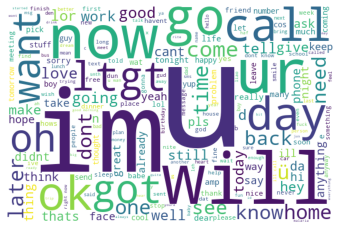

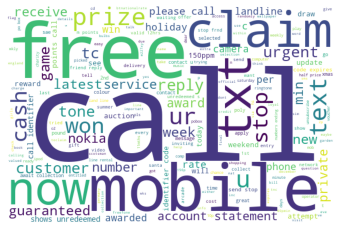

In [6]:
import nltk
import string
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
from wordcloud import WordCloud

def visualize(label):
    text = ''
    for msg in df[df['Label'] == label]['Message_body']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

    

visualize('Non-Spam')
visualize('Spam')